In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (3,3))
  plt.imshow(X[index])
  plt.xlabel(y[index])

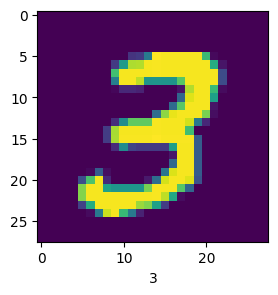

In [ ]:
plot_sample(X_train,y_train,7)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_test[0].shape

(28, 28)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train/255
X_test = X_test/255

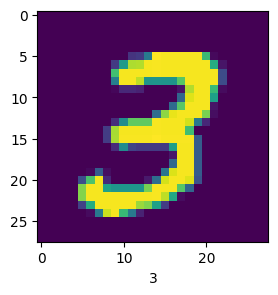

In [ ]:
plot_sample(X_train,y_train,7)

## Lets first create from pre-structured things and libraries
Similar way as before

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu',
           input_shape=(28,28,1), kernel_initializer='he_normal', name='Conv2D-1'),
    layers.MaxPooling2D(pool_size=2, name='MaxPool'),
    layers.Dropout(0.25, name='Dropout-1'),
    layers.Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    layers.Dropout(0.25, name='Dropout-2'),
    layers.Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    layers.Dropout(0.4, name='Dropout-3'),
    layers.Flatten(name='flatten'),
    layers.Dense(128, activation='relu', name='Dense'),
    layers.Dropout(0.4, name='Dropout'),
    layers.Dense(10, activation='softmax', name='Output')
])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D-1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 MaxPool (MaxPooling2D)      (None, 13, 13, 32)        0         
                                                                 
 Dropout-1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 Conv2D-2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 Dropout-2 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 Conv2D-3 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 Dropout-3 (Dropout)         (None, 9, 9, 128)        

In [ ]:
cnn.compile(
        loss='sparse_categorical_crossentropy',
        optimizer="adam",
        metrics=['accuracy']
    )

In [ ]:
history = cnn.fit(
        X_train, y_train,
        batch_size=512,
        epochs=50, verbose=1
    )

Epoch 1/50
118/118 [==============================] - 113s 945ms/step - loss: 0.4403 - accuracy: 0.8625
Epoch 2/50
118/118 [==============================] - 112s 948ms/step - loss: 0.1255 - accuracy: 0.9631
Epoch 3/50
118/118 [==============================] - 118s 1s/step - loss: 0.0881 - accuracy: 0.9742
Epoch 4/50
118/118 [==============================] - 114s 959ms/step - loss: 0.0718 - accuracy: 0.9785
Epoch 5/50
118/118 [==============================] - 113s 956ms/step - loss: 0.0619 - accuracy: 0.9816
Epoch 6/50
118/118 [==============================] - 114s 970ms/step - loss: 0.0533 - accuracy: 0.9838
Epoch 7/50
118/118 [==============================] - 113s 960ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 8/50
118/118 [==============================] - 119s 1s/step - loss: 0.0443 - accuracy: 0.9862
Epoch 9/50
118/118 [==============================] - 114s 964ms/step - loss: 0.0403 - accuracy: 0.9877
Epoch 10/50
118/118 [==============================] - 113s 955ms/step

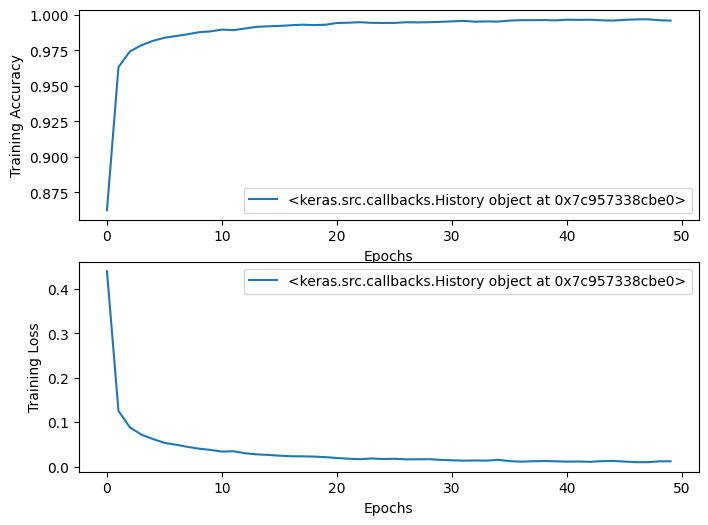

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(8,6))
val_acc = history.history['accuracy']
val_loss = history.history['loss']
ax1.plot(val_acc, label=history)
ax2.plot(val_loss, label=history)
ax1.set_ylabel('Training Accuracy')
ax2.set_ylabel('Training Loss')
ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
test_hist = cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0224 - accuracy: 0.9945


In [ ]:
print("Accuracy = "+str(test_hist[1]*100) + "%")

Accuracy = 99.44999814033508%


# Done !!